In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
userDetails = pd.read_excel(r"D:\Interview\Upliance.ai\Assignment.xlsx",sheet_name='UserDetails.csv')
cookingSessions = pd.read_excel(r"D:\Interview\Upliance.ai\Assignment.xlsx",sheet_name='CookingSessions.csv')
orderDetails = pd.read_excel(r"D:\Interview\Upliance.ai\Assignment.xlsx",sheet_name='OrderDetails.csv')

In [3]:
userDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes


In [4]:
cookingSessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [5]:
orderDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


In [6]:
# Handeling the missing values

print(userDetails.isnull().sum())
print(cookingSessions.isnull().sum())
print(orderDetails.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [7]:
# noticed there are 2 missing values in Rating column filling with mean
orderDetails['Rating'] = round(orderDetails['Rating'].fillna(orderDetails['Rating'].mean()),2)
orderDetails

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.00,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.00,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.29,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.00,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.00,S005
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.00,S006
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.00,S007
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,4.29,S008
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.00,S009
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.00,S010


In [8]:
# Merging the data

# Merge cooking_sessions with order_details on 'Session ID'
merged_sessions_orders = pd.merge(cookingSessions, orderDetails, on='Session ID', how='inner')

merged_sessions_orders['User ID'] = merged_sessions_orders['User ID_x']
merged_sessions_orders['Dish Name'] = merged_sessions_orders['Dish Name_x']
merged_sessions_orders['Meal Type'] = merged_sessions_orders['Meal Type_x']
merged_sessions_orders.drop(['User ID_x','User ID_y','Dish Name_x','Dish Name_y','Meal Type_x','Meal Type_y'],axis=1,inplace=True)

# Merge with user_details on 'User ID'
final_data = pd.merge(merged_sessions_orders, userDetails, on='User ID', how='inner')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Session ID         16 non-null     object        
 1   Session Start      16 non-null     datetime64[ns]
 2   Session End        16 non-null     datetime64[ns]
 3   Duration (mins)    16 non-null     int64         
 4   Session Rating     16 non-null     float64       
 5   Order ID           16 non-null     int64         
 6   Order Date         16 non-null     datetime64[ns]
 7   Order Status       16 non-null     object        
 8   Amount (USD)       16 non-null     float64       
 9   Time of Day        16 non-null     object        
 10  Rating             16 non-null     float64       
 11  User ID            16 non-null     object        
 12  Dish Name          16 non-null     object        
 13  Meal Type          16 non-null     object        
 14  User Name   

In [9]:
final_data

,Session ID,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Order Status,Amount (USD),Time of Day,...,Dish Name,Meal Type,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,S001,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,2024-12-01,Completed,15.0,Night,...,Spaghetti,Dinner,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,S002,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,2024-12-01,Completed,10.0,Day,...,Caesar Salad,Lunch,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,S003,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,2024-12-02,Canceled,12.5,Night,...,Grilled Chicken,Dinner,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,S004,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,2024-12-02,Completed,8.0,Morning,...,Pancakes,Breakfast,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,S005,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,2024-12-03,Completed,9.0,Day,...,Caesar Salad,Lunch,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
5,S006,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,2024-12-03,Completed,14.0,Night,...,Spaghetti,Dinner,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
6,S007,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,1007,2024-12-04,Completed,13.5,Night,...,Grilled Chicken,Dinner,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
7,S008,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,2024-12-04,Canceled,11.0,Day,...,Veggie Burger,Lunch,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
8,S009,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,2024-12-05,Completed,12.0,Night,...,Grilled Chicken,Dinner,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
9,S010,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,2024-12-05,Completed,7.0,Morning,...,Oatmeal,Breakfast,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8


In [10]:
# Popular Dishes dor each Meal Type
popular_dishes = final_data.groupby(['Dish Name', 'Meal Type']).size().reset_index(name='Count')
popular_dishes = popular_dishes.sort_values(by='Count', ascending=False)
print(popular_dishes.head())

         Dish Name  Meal Type  Count
1  Grilled Chicken     Dinner      4
4        Spaghetti     Dinner      4
0     Caesar Salad      Lunch      3
3         Pancakes  Breakfast      2
5    Veggie Burger      Lunch      2


In [11]:
# Pivot Table for Popular Dishes dor each Meal Type
pivot_popular_dishes = popular_dishes.pivot_table(index='Dish Name', columns='Meal Type', values='Count', aggfunc='sum', fill_value=0)
print(pivot_popular_dishes)

Meal Type        Breakfast  Dinner  Lunch
Dish Name                                
Caesar Salad             0       0      3
Grilled Chicken          0       4      0
Oatmeal                  1       0      0
Pancakes                 2       0      0
Spaghetti                0       4      0
Veggie Burger            0       0      2


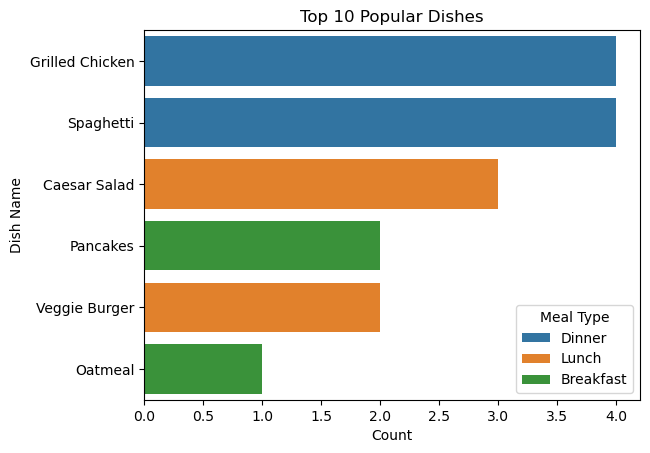

In [12]:
# Popular dishes by Meal type
sns.barplot(x='Count', y='Dish Name', data=popular_dishes.head(10), hue='Meal Type')
plt.title('Top 10 Popular Dishes')
plt.show()

In [13]:
# Analyze orders by location
orders_by_location = final_data.groupby('Location')['Order ID'].count().reset_index(name='Total Orders').sort_values(by='Total Orders',ascending=False)
print(orders_by_location)

        Location  Total Orders
2        Chicago             3
3    Los Angeles             3
5       New York             3
6  San Francisco             2
7        Seattle             2
0         Austin             1
1         Boston             1
4          Miami             1


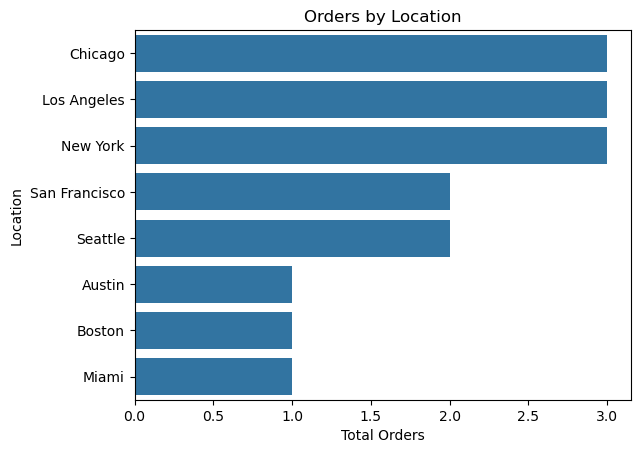

In [14]:
# Orders by location
sns.barplot(x='Total Orders', y='Location', data=orders_by_location)
plt.title('Orders by Location')
plt.show()

In [15]:
# Analyze preferred meals by age group
final_data['Age Group'] = pd.cut(final_data['Age'], bins=[0, 20, 30, 40, 50], labels=['<20', '20-30', '30-40', '40+'])
meals_by_age = final_data.groupby(['Age Group', 'Favorite Meal']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)
print(meals_by_age)

   Age Group Favorite Meal  Count
4      20-30        Dinner      6
8      30-40         Lunch      3
9        40+     Breakfast      3
5      20-30         Lunch      2
6      30-40     Breakfast      1
7      30-40        Dinner      1
0        <20     Breakfast      0
1        <20        Dinner      0
2        <20         Lunch      0
3      20-30     Breakfast      0
10       40+        Dinner      0
11       40+         Lunch      0


C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_29052\965107357.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meals_by_age = final_data.groupby(['Age Group', 'Favorite Meal']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)


In [16]:
# Pivot table for preferred meals by age group
pivot_meals_by_age = meals_by_age.pivot_table(index='Age Group', columns='Favorite Meal', values='Count', aggfunc='sum', fill_value=0)
print(pivot_meals_by_age)

Favorite Meal  Breakfast  Dinner  Lunch
Age Group                              
<20                    0       0      0
20-30                  0       6      2
30-40                  1       1      3
40+                    3       0      0


C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_29052\3849627228.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_meals_by_age = meals_by_age.pivot_table(index='Age Group', columns='Favorite Meal', values='Count', aggfunc='sum', fill_value=0)


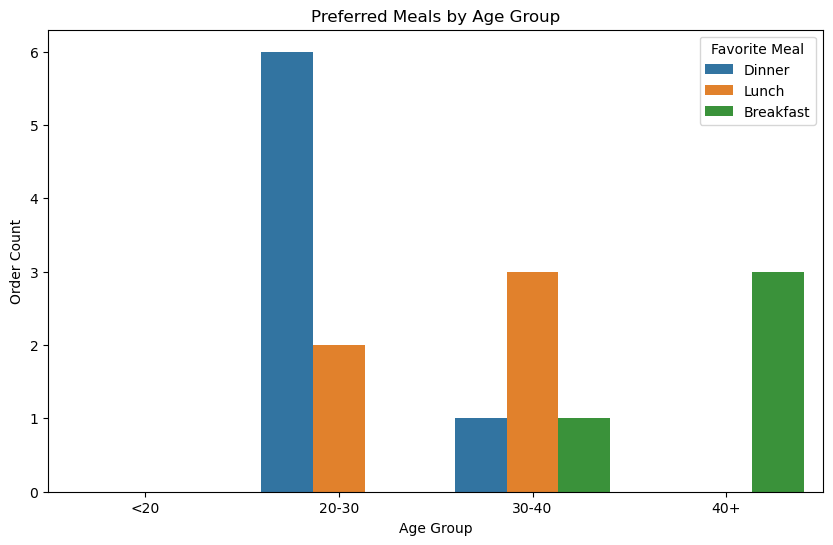

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Count', hue='Favorite Meal', data=meals_by_age)
plt.title('Preferred Meals by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Order Count')
plt.show()

In [86]:
# poular dish name by different age groups
order_counts_by_age_group = final_data.groupby(['Age Group', 'Dish Name']).size().reset_index(name='Order Count')
order_counts_by_age_group = order_counts_by_age_group.sort_values(['Age Group', 'Order Count'], ascending=[True, False])
most_ordered_dish_by_age_group = order_counts_by_age_group.groupby('Age Group').head(1)
print(most_ordered_dish_by_age_group)

   Age Group        Dish Name  Order Count
0        <20     Caesar Salad            0
7      20-30  Grilled Chicken            3
16     30-40        Spaghetti            2
19       40+  Grilled Chicken            1


C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_6220\4016309644.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_counts_by_age_group = final_data.groupby(['Age Group', 'Dish Name']).size().reset_index(name='Order Count')
C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_6220\4016309644.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_ordered_dish_by_age_group = order_counts_by_age_group.groupby('Age Group').head(1)


In [ ]:
# Pivot table to display poular dish name by different age groups
pivot_dishes_by_age_group = final_data.pivot_table(index='Dish Name', columns='Age Group', values='Order ID', aggfunc='count', fill_value=0)
print(pivot_dishes_by_age_group)

Age Group        <20  20-30  30-40  40+
Dish Name                              
Caesar Salad       0      2      1    0
Grilled Chicken    0      3      0    1
Oatmeal            0      0      1    0
Pancakes           0      1      0    1
Spaghetti          0      2      2    0
Veggie Burger      0      0      1    1


C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_6220\1258245060.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_dishes_by_age_group = final_data.pivot_table(index='Dish Name', columns='Age Group', values='Order ID', aggfunc='count', fill_value=0)


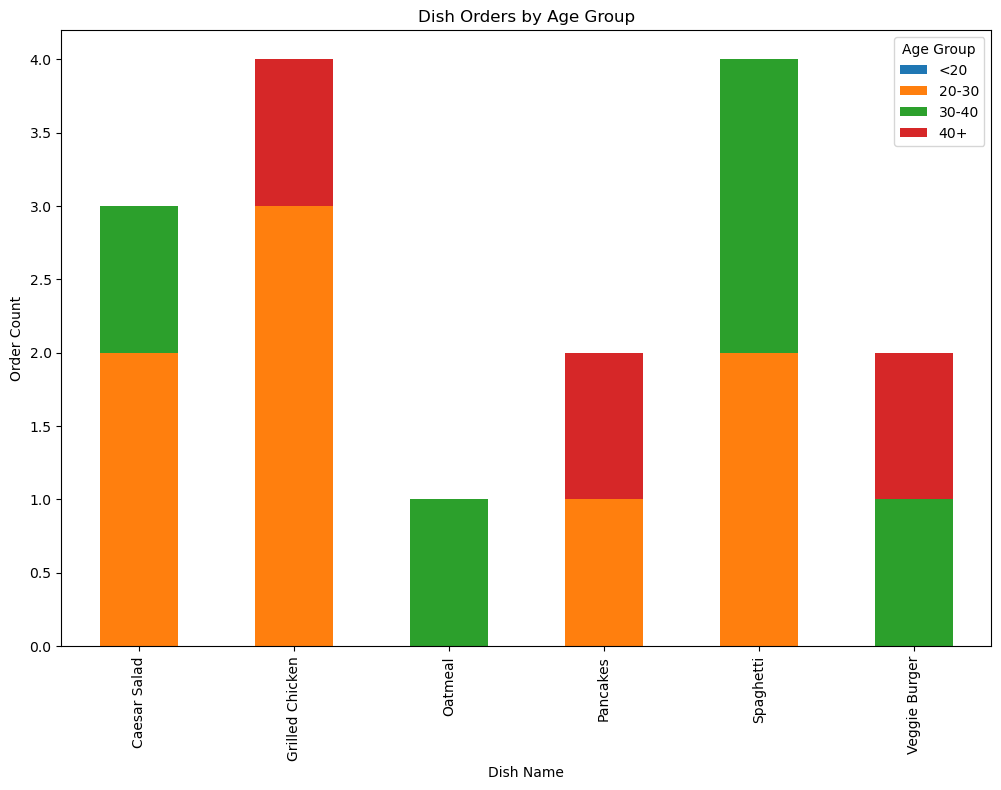

In [83]:
# Plotting the bar chart
pivot_dishes_by_age_group.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Dish Orders by Age Group')
plt.xlabel('Dish Name')
plt.ylabel('Order Count')
plt.show()

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_6220\2077614559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_counts_by_age_group = final_data.groupby(['Age Group', 'Dish Name']).size().reset_index(name='Order Count')


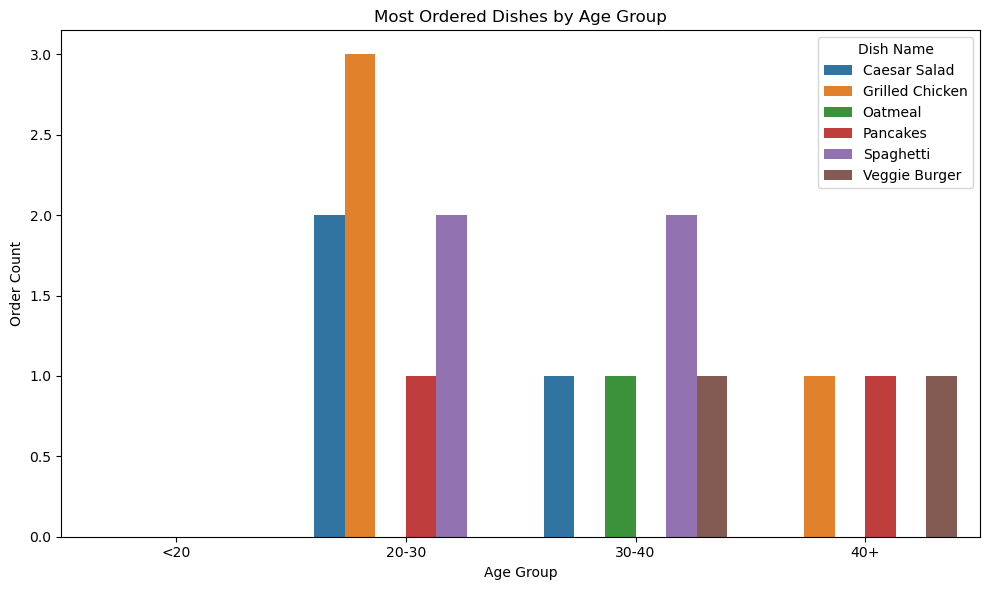

In [88]:
order_counts_by_age_group = final_data.groupby(['Age Group', 'Dish Name']).size().reset_index(name='Order Count')

order_counts_by_age_group = order_counts_by_age_group.sort_values(['Age Group', 'Order Count'], ascending=[True, False])

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Order Count', hue='Dish Name', data=order_counts_by_age_group)
plt.title('Most Ordered Dishes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

In [36]:
# Correlation between session ratings and order amounts
correlation = final_data[['Session Rating', 'Amount (USD)']].corr()
print(correlation)

                Session Rating  Amount (USD)
Session Rating        1.000000      0.502733
Amount (USD)          0.502733      1.000000


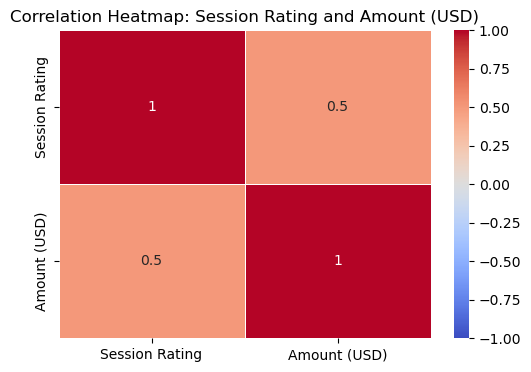

In [ ]:
# Plotting the heatmap for correlation matrix
correlation = final_data[['Session Rating', 'Amount (USD)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap: Session Rating and Amount (USD)")
plt.show()

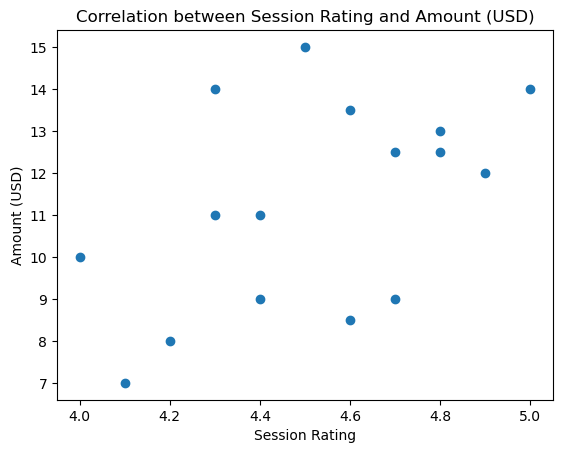

In [77]:
plt.scatter(final_data['Session Rating'], final_data['Amount (USD)'])
plt.xlabel('Session Rating')
plt.ylabel('Amount (USD)')
plt.title('Correlation between Session Rating and Amount (USD)')
plt.show()

In [37]:
# Average order amount by session duration
avg_order_by_duration = final_data.groupby('Duration (mins)')['Amount (USD)'].mean().reset_index()
print(avg_order_by_duration)

   Duration (mins)  Amount (USD)
0               10      7.000000
1               15      9.000000
2               20     10.666667
3               30     10.900000
4               40     12.750000
5               45     13.250000


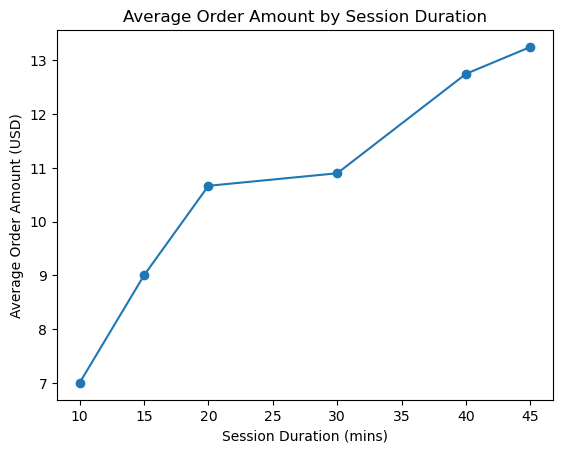

In [ ]:
# Plot average order amount by session duration
plt.plot(avg_order_by_duration['Duration (mins)'], avg_order_by_duration['Amount (USD)'], marker='o')
plt.xlabel('Session Duration (mins)')
plt.ylabel('Average Order Amount (USD)')
plt.title('Average Order Amount by Session Duration')
plt.show()

In [20]:
# Ratings by session duration
duration_rating_table = final_data.groupby(['Duration (mins)', 'Session Rating']).size().reset_index(name='Count')
print(duration_rating_table)

    Duration (mins)  Session Rating  Count
0                10             4.1      1
1                15             4.7      1
2                20             4.0      1
3                20             4.3      1
4                20             4.4      1
5                30             4.2      1
6                30             4.3      1
7                30             4.4      1
8                30             4.5      1
9                30             4.6      1
10               40             4.7      1
11               40             4.8      1
12               40             4.9      1
13               40             5.0      1
14               45             4.6      1
15               45             4.8      1


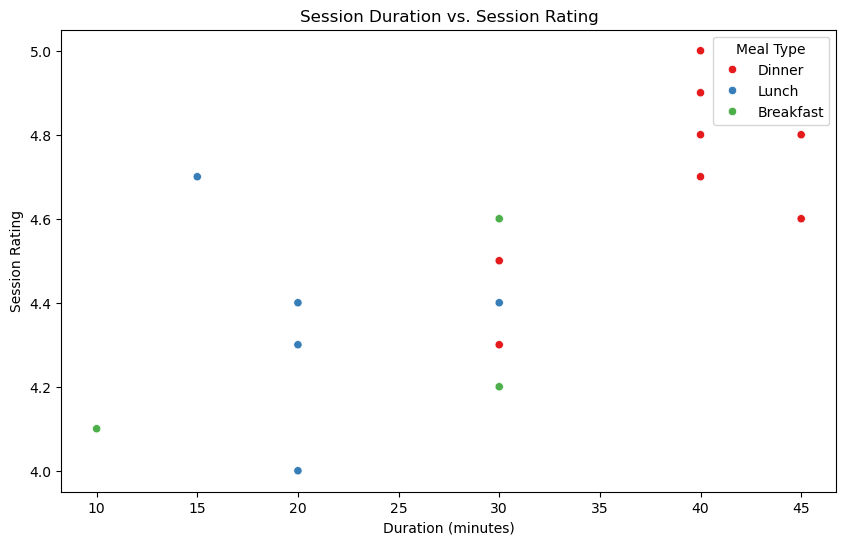

In [75]:
# Plotting session duration vs. rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=final_data, x='Duration (mins)', y='Session Rating', hue='Meal Type', palette='Set1')
plt.title('Session Duration vs. Session Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Session Rating')
plt.show()

In [ ]:
# amoount spent per meal type
amount_spent_per_meal = final_data.groupby('Meal Type')['Amount (USD)'].sum().reset_index(name='Total Amount Spent')
print(amount_spent_per_meal)

   Meal Type  Total Amount Spent
0  Breakfast                23.5
1     Dinner               106.5
2      Lunch                50.0


C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_6220\1663931125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_sessions_orders, x='Meal Type', y='Amount (USD)', palette='Set3')


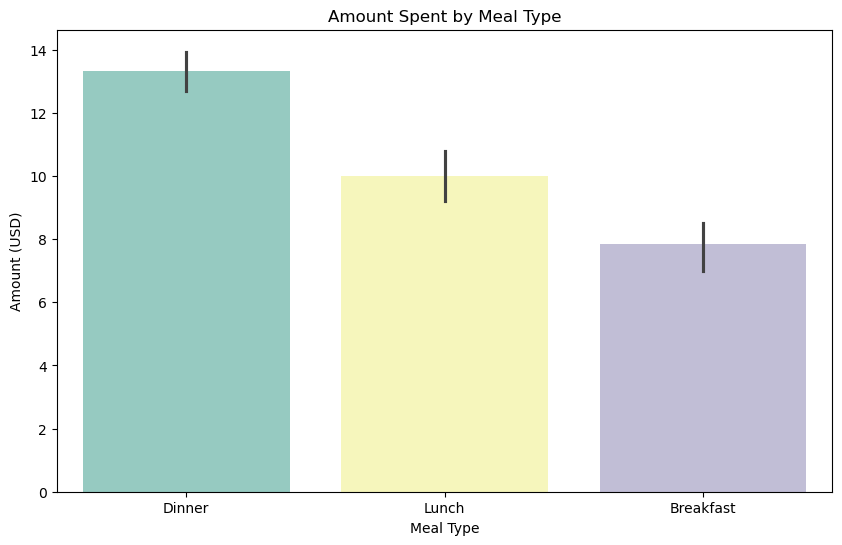

In [42]:
# Plotting amount spent by meal type
plt.figure(figsize=(10,6))
sns.barplot(data=merged_sessions_orders, x='Meal Type', y='Amount (USD)', palette='Set3')
plt.title('Amount Spent by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Amount (USD)')
plt.show()

In [ ]:
# Pivot table to to show dishes ordered from different location
order_counts = final_data.groupby(['Location', 'Dish Name']).size().reset_index(name='Order Count')
pivot_order_counts = order_counts.pivot_table(index='Location', columns='Dish Name', values='Order Count', aggfunc='sum', fill_value=0)
print(pivot_order_counts)

Dish Name      Caesar Salad  Grilled Chicken  Oatmeal  Pancakes  Spaghetti  \
Location                                                                     
Austin                    0                1        0         0          0   
Boston                    0                0        0         0          1   
Chicago                   0                1        0         1          0   
Los Angeles               1                0        1         0          1   
Miami                     0                0        0         0          0   
New York                  0                1        0         1          1   
San Francisco             1                0        0         0          1   
Seattle                   1                1        0         0          0   

Dish Name      Veggie Burger  
Location                      
Austin                     0  
Boston                     0  
Chicago                    1  
Los Angeles                0  
Miami                      1  
Ne

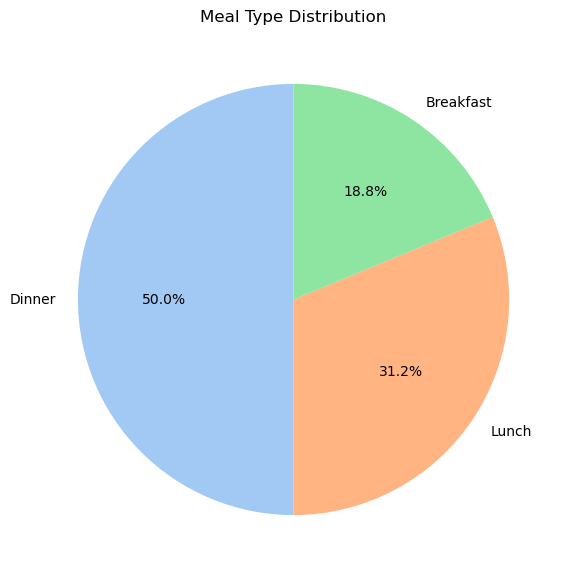

In [84]:
# Plotting meal type distribution
meal_type_count = final_data['Meal Type'].value_counts()
plt.figure(figsize=(7,7))
meal_type_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Meal Type Distribution')
plt.ylabel('')
plt.show()

In [1]:
# The pie chart reveals that Dinner accounts for the largest share of orders (50%), followed by Lunch (31.2%) and Breakfast (18.8%). 
# This highlights Dinner as the most profitable meal type, indicating opportunities for further investment and promotion during this time slot.